# Final Capstone Project: FitBit Fitness Tracker Data - Weight loss prediction using differet classifiers

**Overview**: 
In this project, I’m trying to predict the weight loss based on daily activity. In addition, will identify the parameters or factors influence the weightless. 


### Getting Started

# Research question  
In this project, I’m trying to predit the weight loss based on daily activity. In addition, will identify the parameters or factors influence the weightless.

## Data Sources
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

Fitbit weight data loss dataset from https://www.kaggle.com/datasets/arashnic/fitbit

## Techniques  used
Will be using the various regression, classifier  and ensamble model to identify the best model for prediction.  


## The expected results
I'll will be exploring different regression and classification models to preducit the weight loss and the accuracy of preduction. In addition, will be exploring which parameters will mostly impact the prediction.



## Why this question is important
Weight loss is a difficult and often frustrating process, but it can be life-changing. Weightloss has proven to be improving health, self-esteem and life expectancy. Knowing the parameters which can affect the weightloss would be beneficial for people doing weightloss.

### **Import necessary libraries**

Import the necessary computation, model and graph libraries.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE

#import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/ColabNotebooks/')


import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")

### **Load the merged activity data**

- Understand the data ( count, mean, std and min )
- Print few lines of data for preview

In [2]:
df = pd.read_csv('data/dailyActivity_merged.csv')
df_orig=df
df.head()
print(df.describe())

# Shape and preview
print('Fitbit users Daily Activity Log Records :',df.shape)
df.head()

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  4.570000e+02    457.000000     457.000000       457.000000   
mean   4.628595e+09   6546.562363       4.663523         4.609847   
std    2.293781e+09   5398.493064       4.082072         4.068540   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.347168e+09   1988.000000       1.410000         1.280000   
50%    4.057193e+09   5986.000000       4.090000         4.090000   
75%    6.391747e+09  10198.000000       7.160000         7.110000   
max    8.877689e+09  28497.000000      27.530001        27.530001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                457.000000          457.000000                457.000000   
mean                   0.179427            1.180897                  0.478643   
std                    0.849232            2.487159                  0.830995   
min                    0.000000            0.000000   

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [3]:
print(df.info())
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

## Exploratory Data Analysis

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
                 Id                   ActivityDate    TotalSteps  \
count  4.570000e+02                            457    457.000000   
mean   4.628595e+09  2016-04-04 04:40:26.258205696   6546.562363   
min    1.503960e+09            2016-03-12 00:00:00      0.000000   
25%    2.347168e+09            2016-04-02 00:00:00   1988.000000   
50%    4.057193e+09            2016-04-05 00:00:00   5986.000000   
75%    6.391747e+09            2016-04-08 00:00:00  10198.000000   
max    8.877689e+09            2016-04-12 00:00:00  28497.000

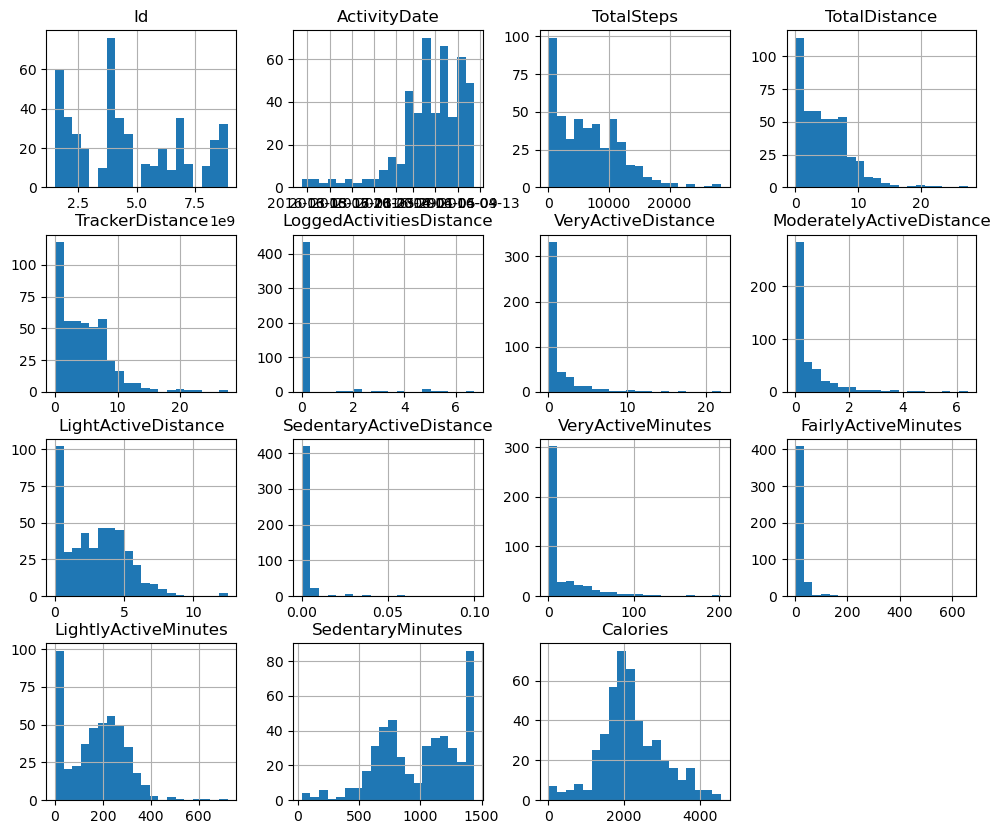

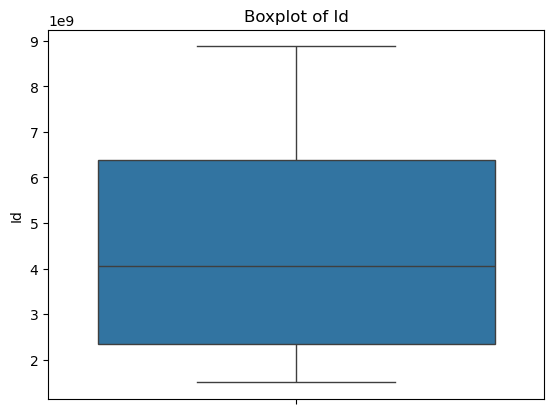

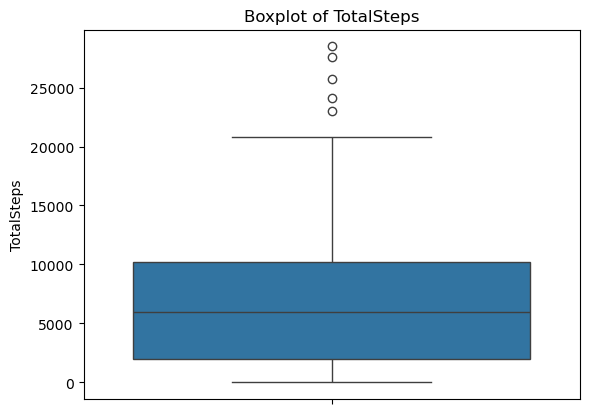

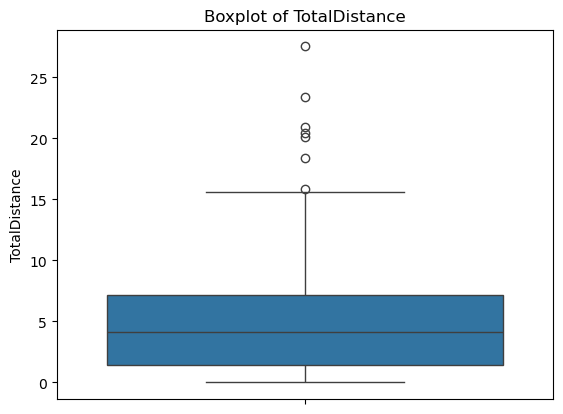

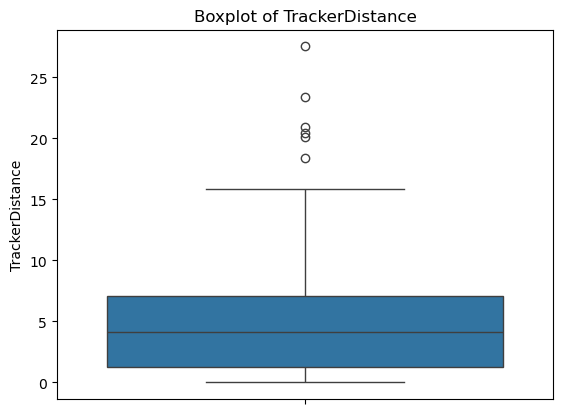

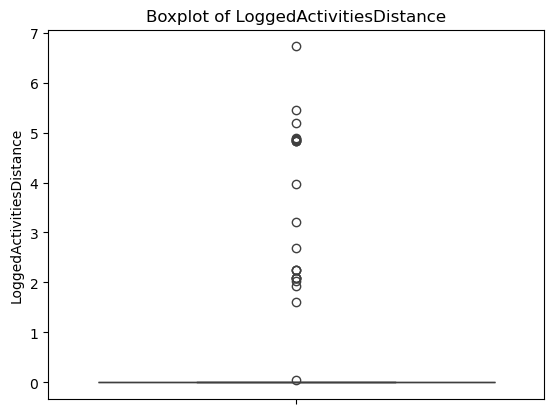

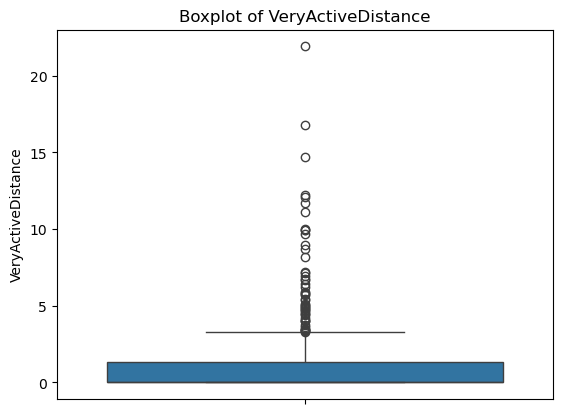

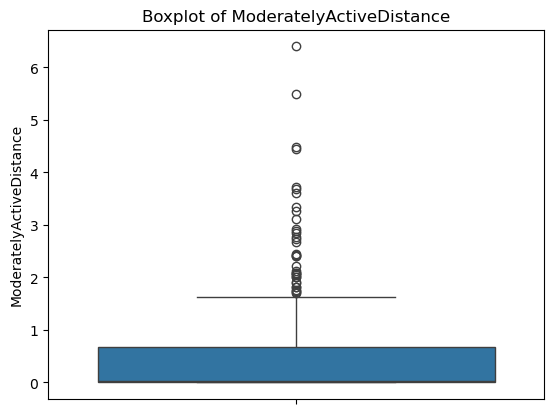

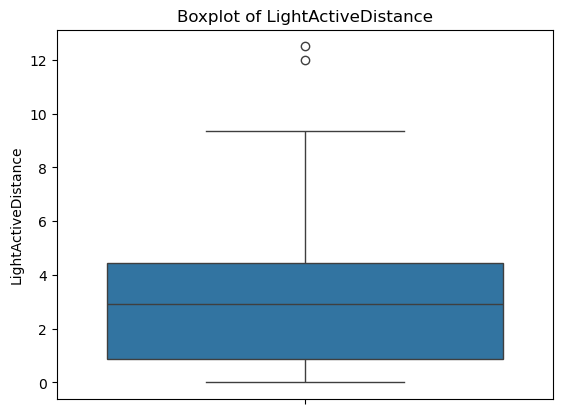

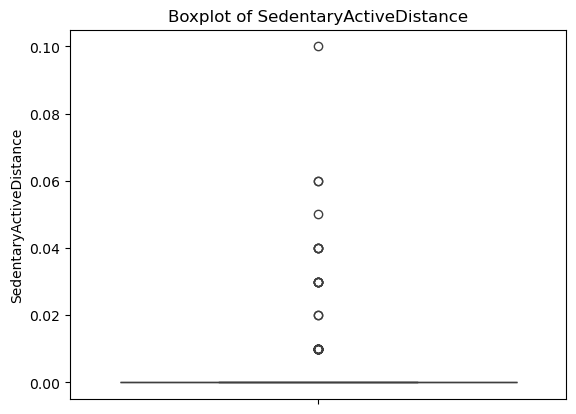

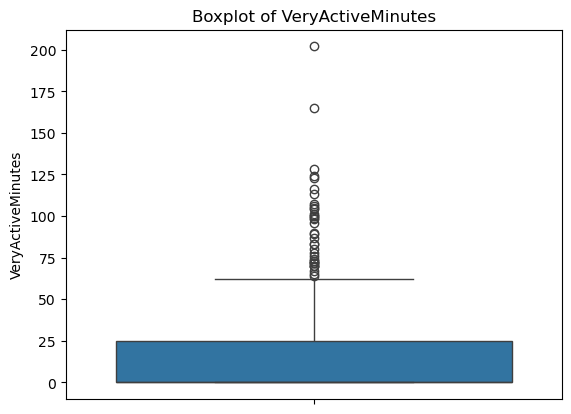

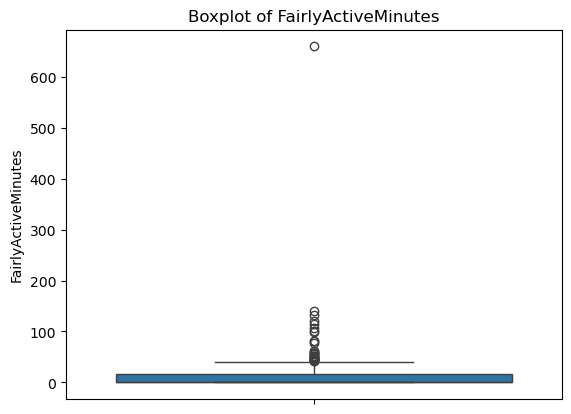

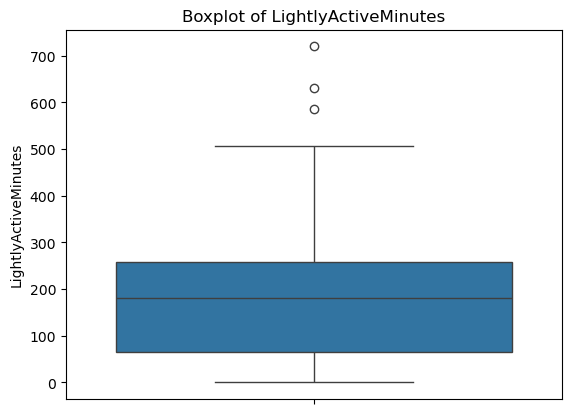

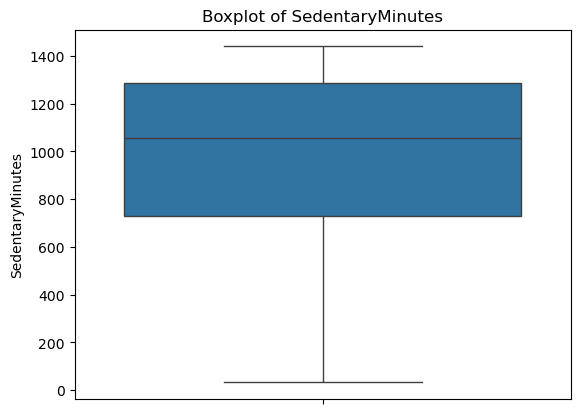

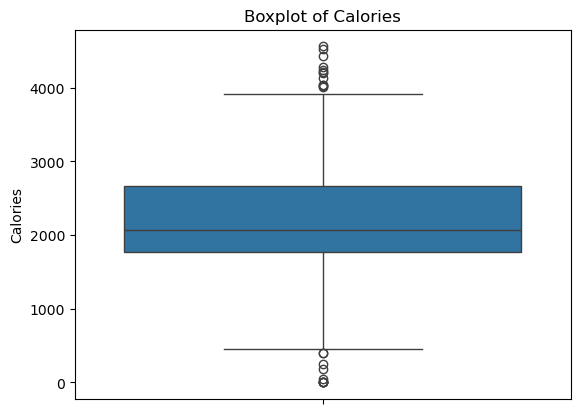

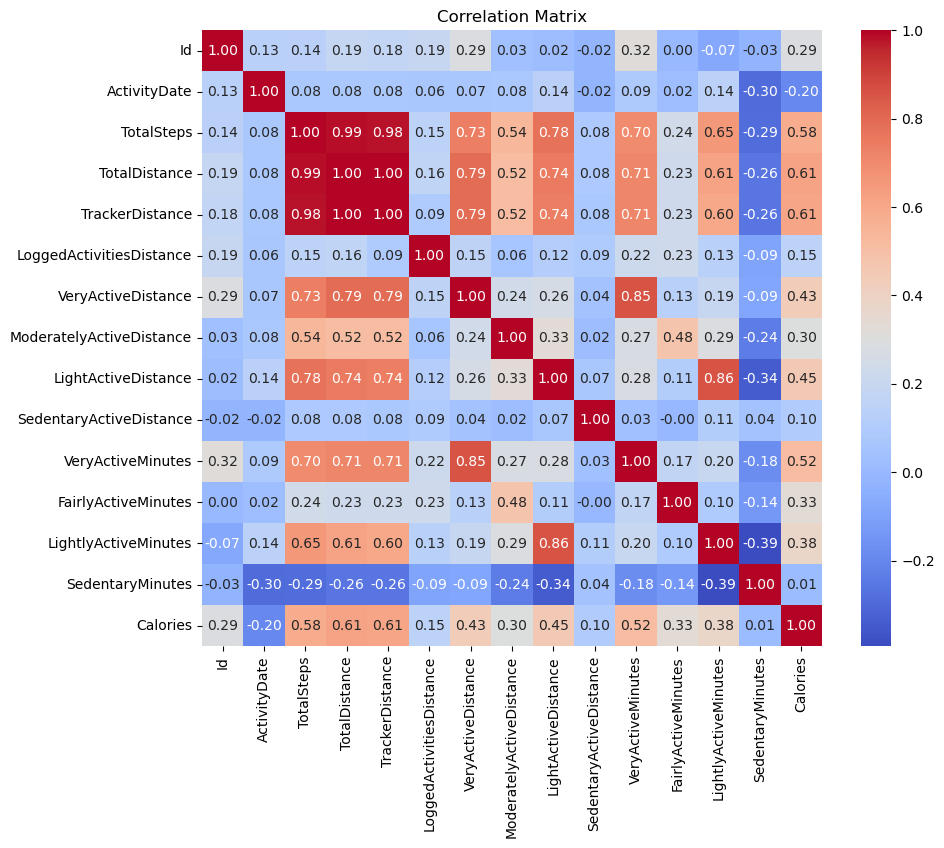

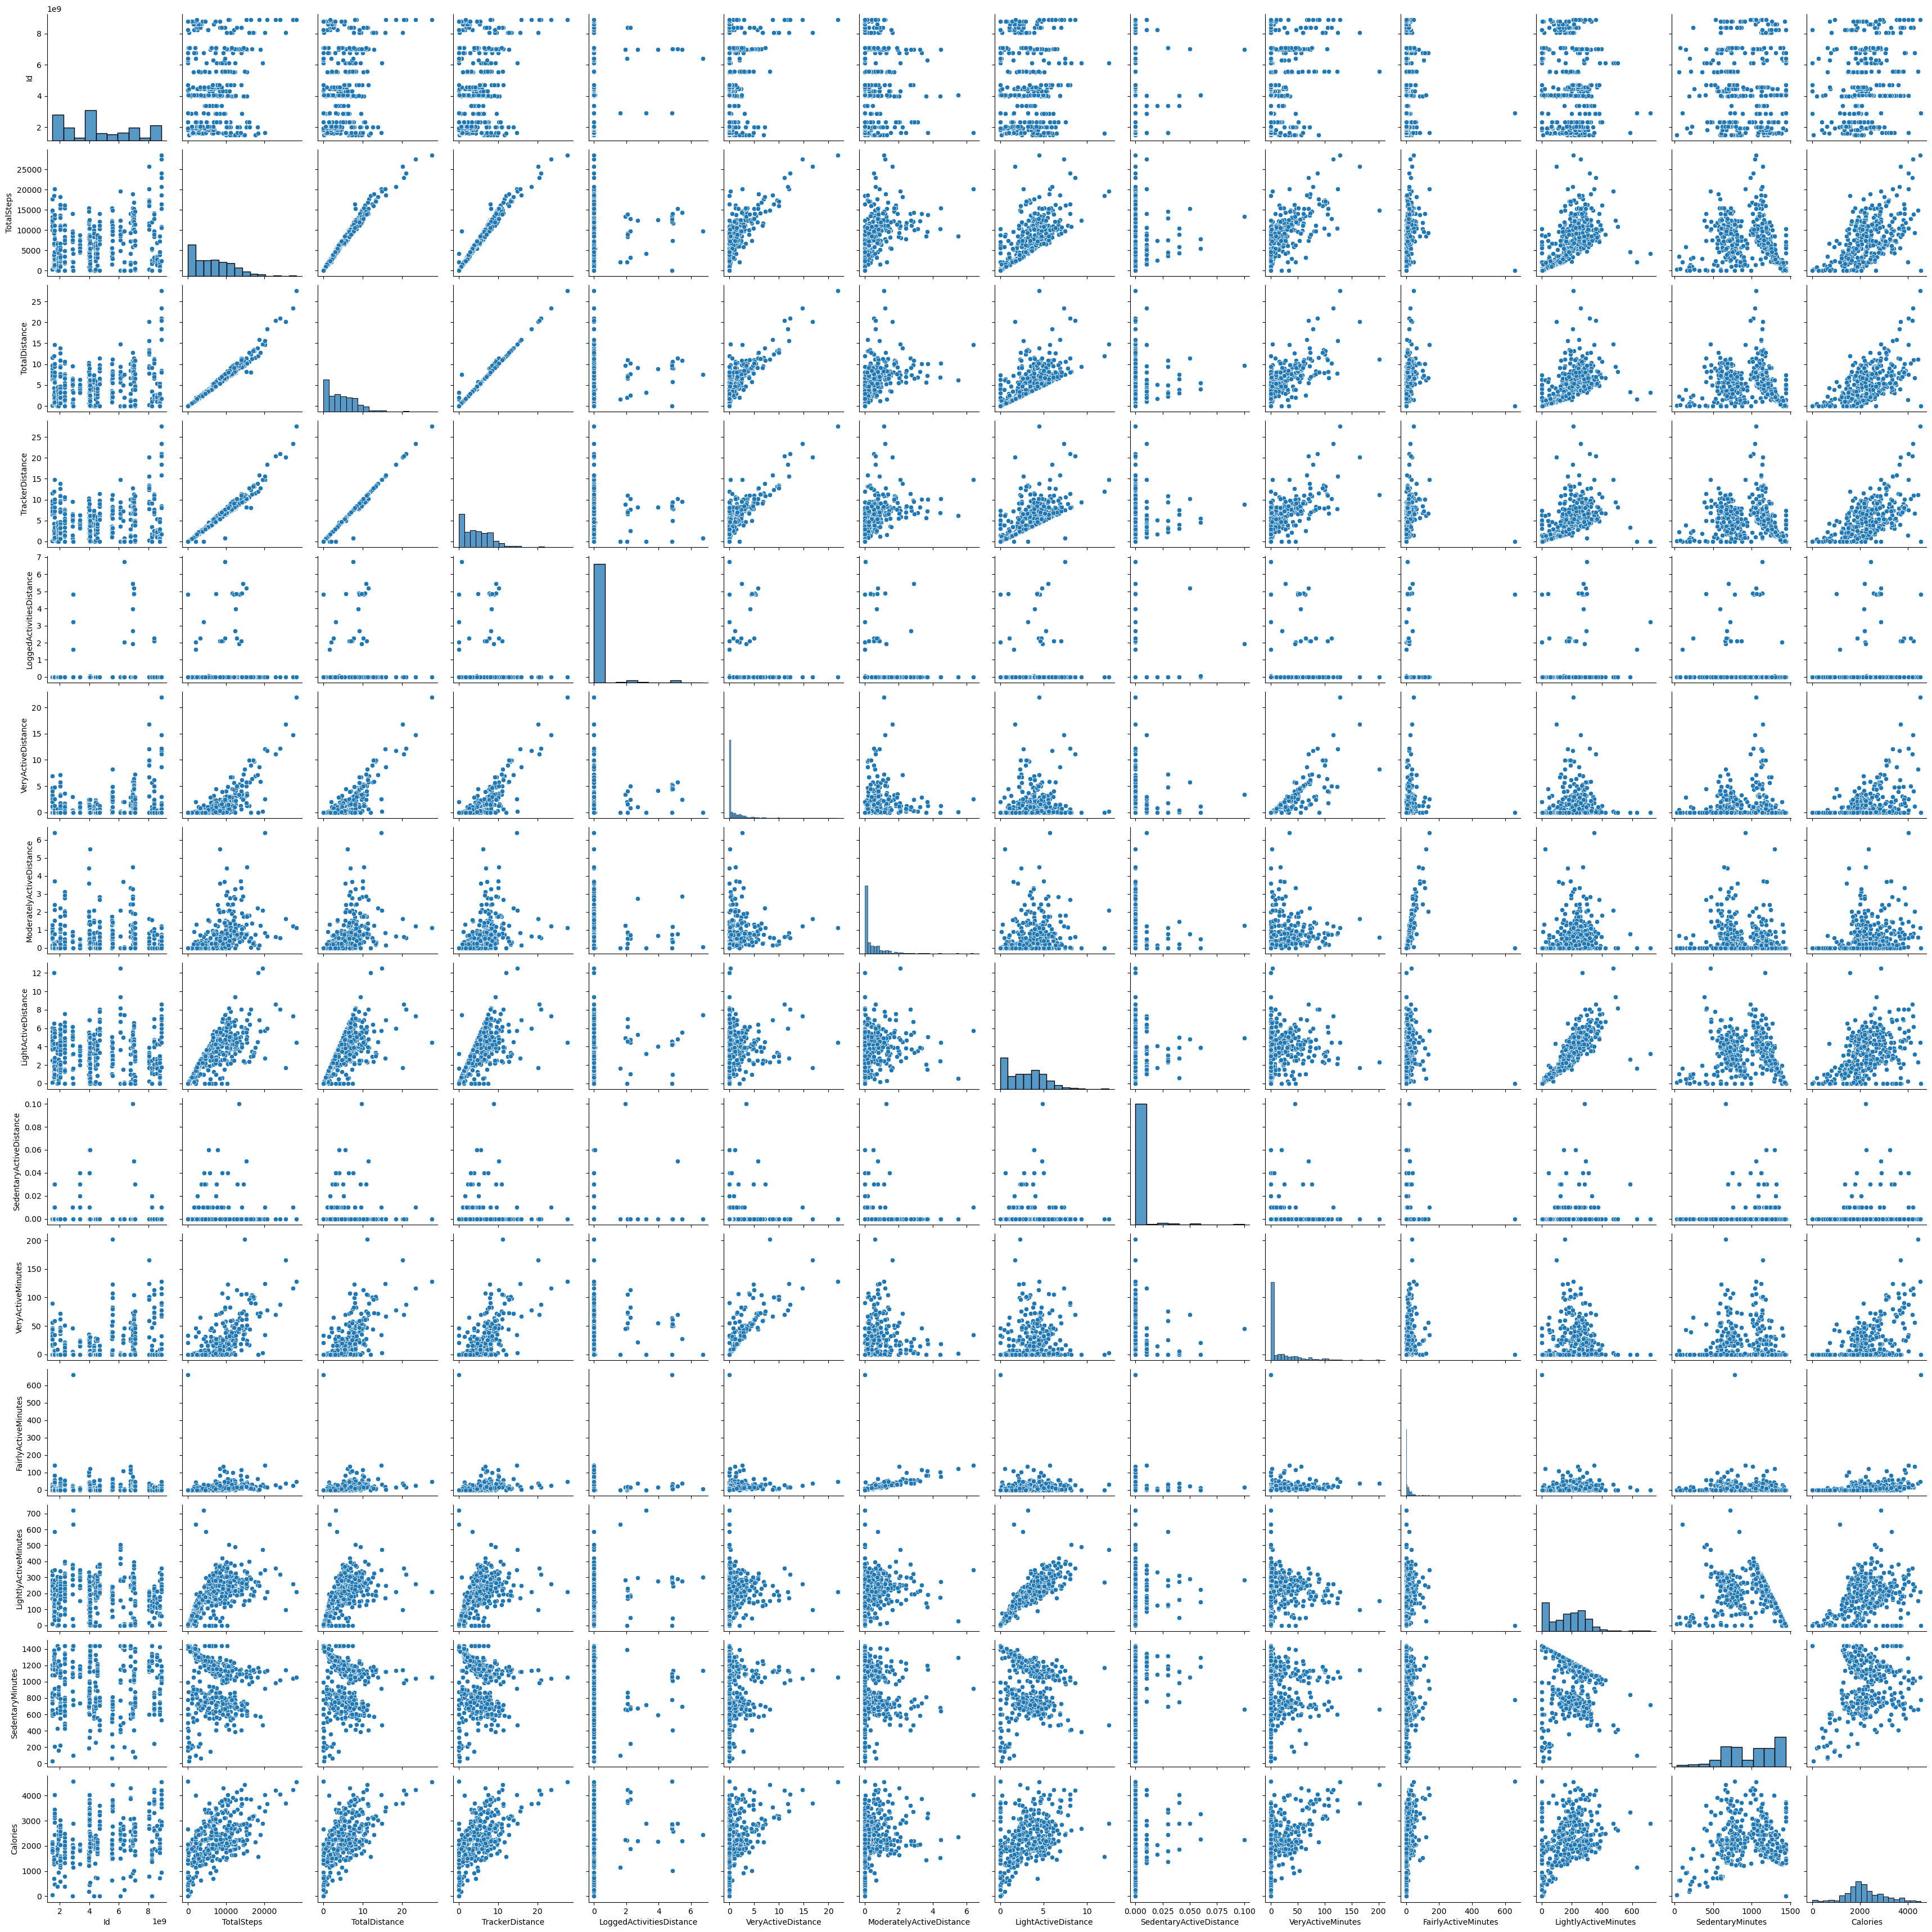

In [4]:
# performing exploratory data analysis on the dataframe df

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical features
print(df.describe())

# Explore data types of each column
print(df.dtypes)

# Explore unique values for categorical features
for col in df.select_dtypes(include=['object', 'category']):
    print(f"Unique values for {col}: {df[col].unique()}")
    print(f"Value counts for {col}: \n{df[col].value_counts()}")

# Visualizations
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Boxplots for numerical features to identify outliers
for col in df.select_dtypes(include=np.number):
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships between numerical features
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

# Analyze relationships between categorical features and numerical features
for col in df.select_dtypes(include=['object', 'category']):
    for num_col in df.select_dtypes(include=np.number):
        sns.boxplot(x=col, y=num_col, data=df)
        plt.title(f"Boxplot of {num_col} vs. {col}")
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed
        plt.show()




## Summary of Data Analysis:
- Strong correlation between Total Distance and Tracker Distance. Very Active Distance also shows a strong correlation with Total Distance and Tracker Distance features.

However, there is weak correlation across the board between the computed weight loss features and the other features.

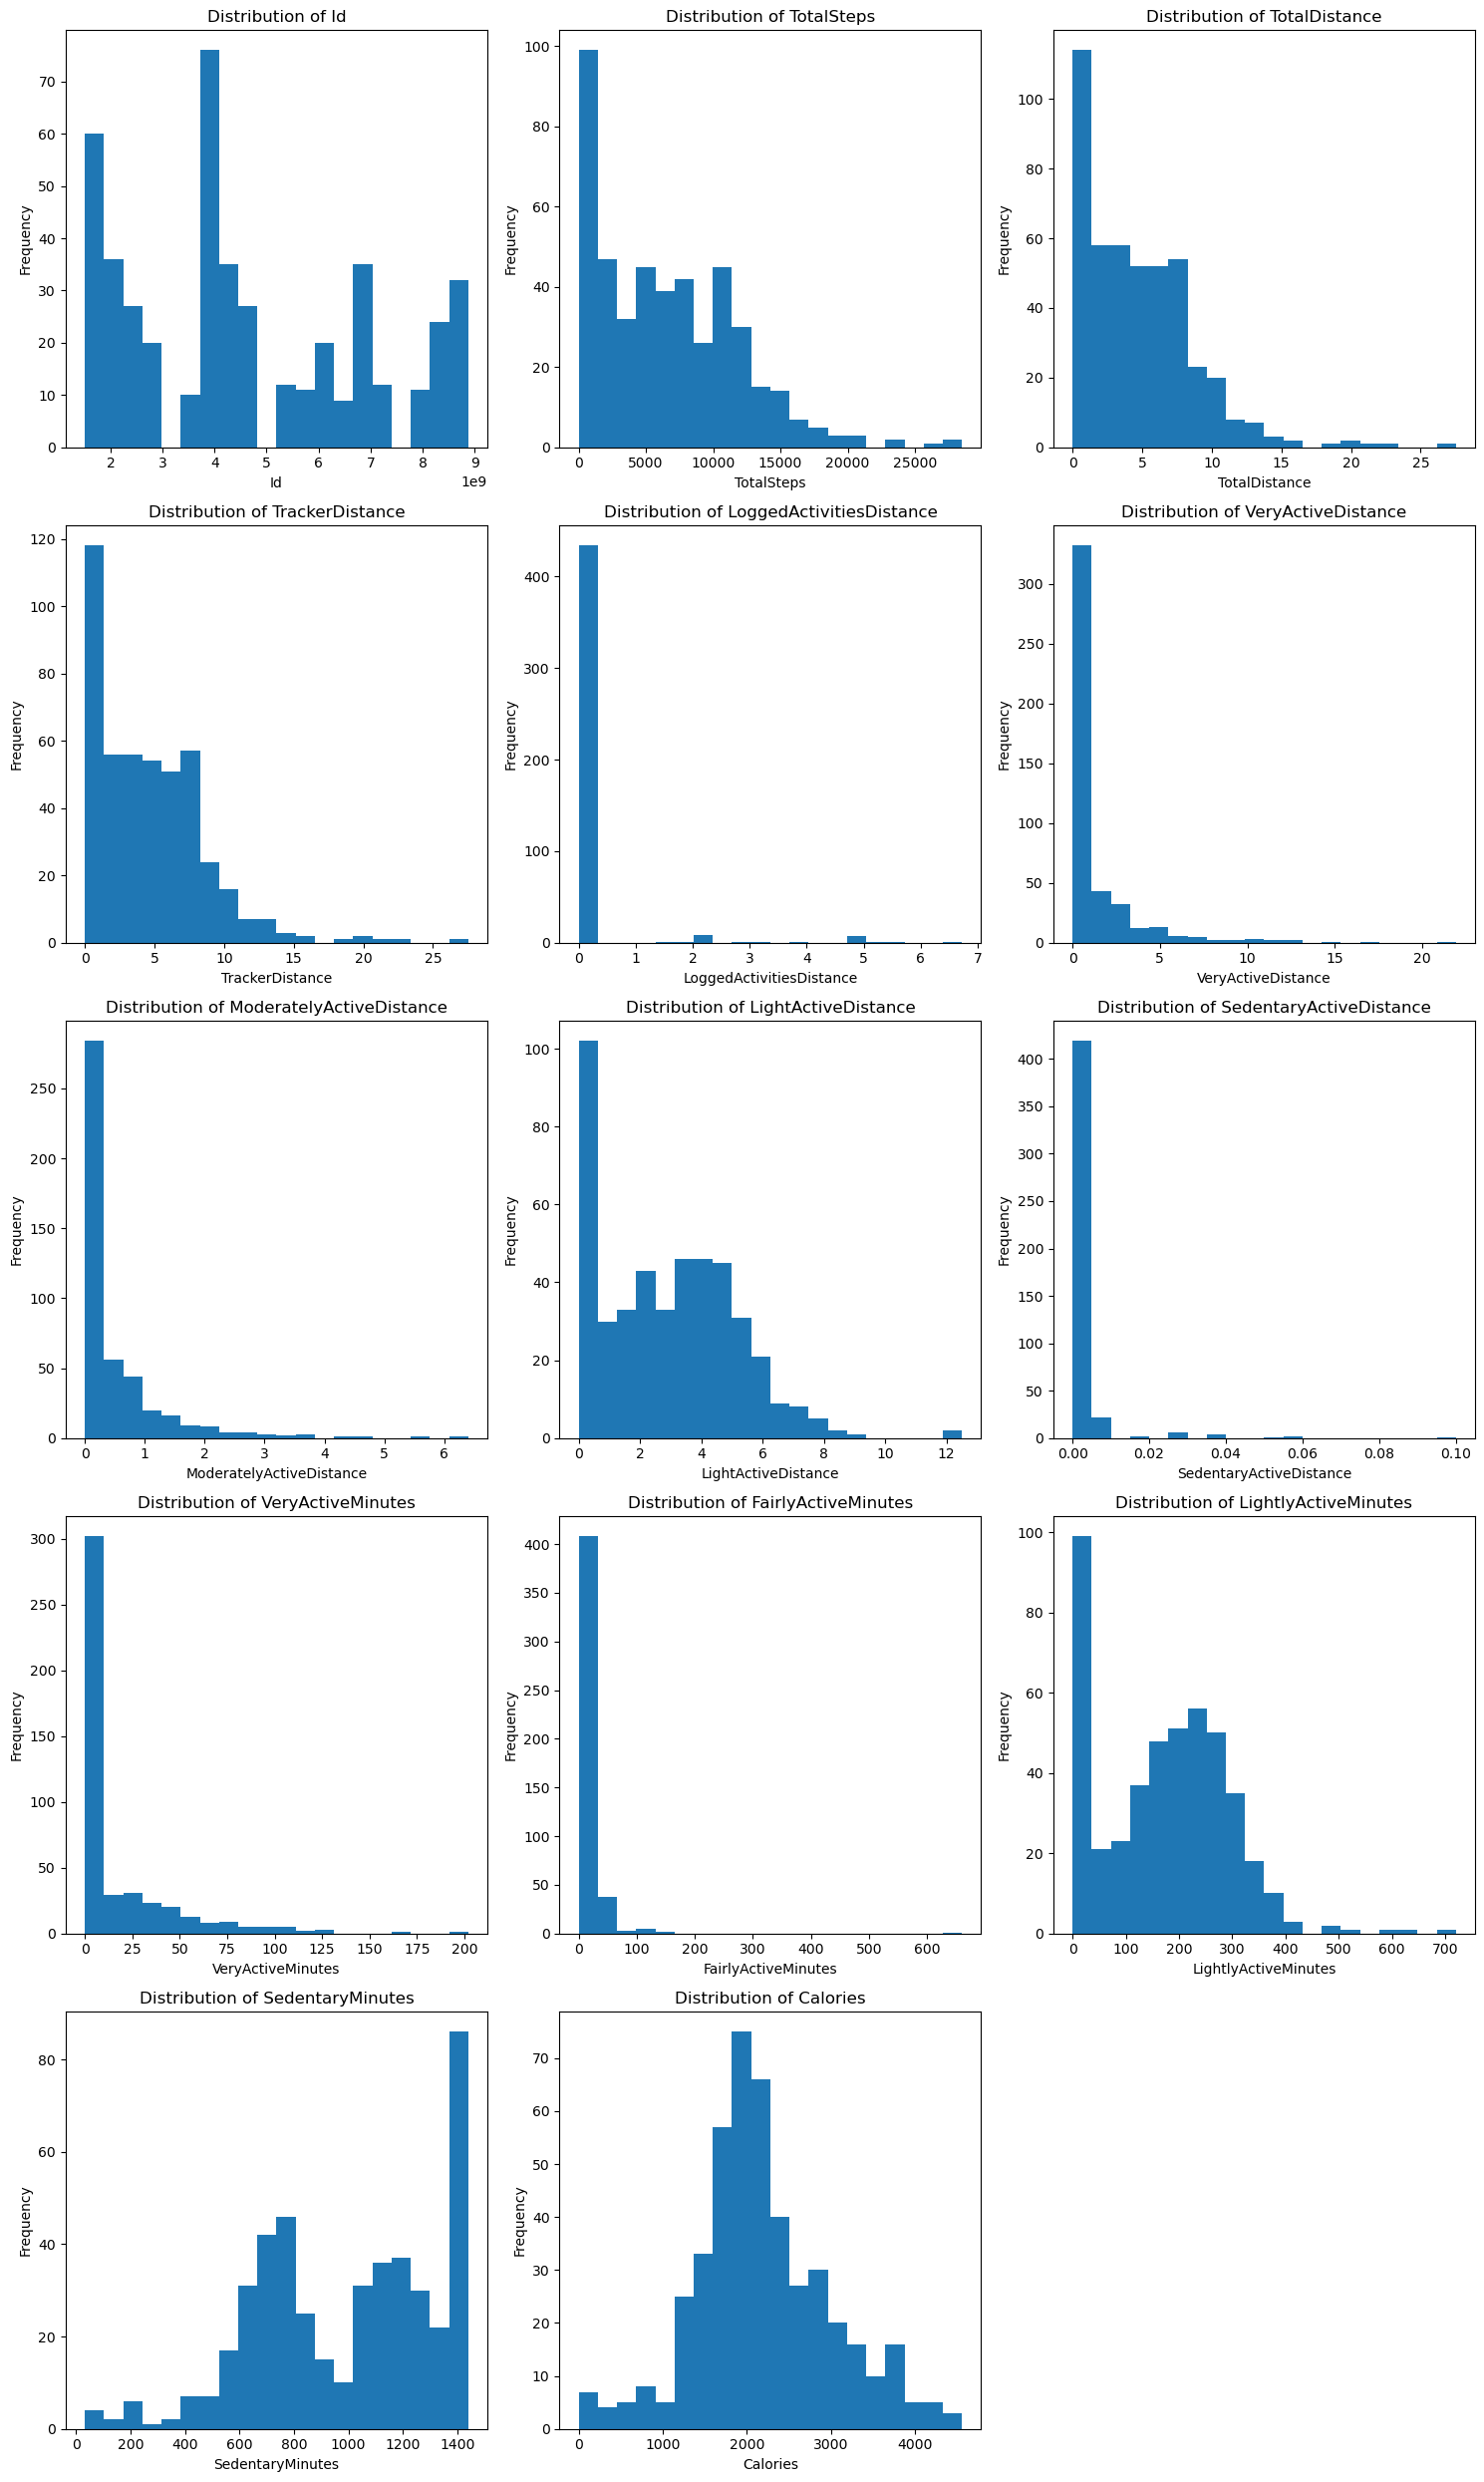

In [5]:
# univariate analysis and plot using subplot

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame (loaded in the previous code)

# Select numerical features for univariate analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Create subplots
num_plots = len(numerical_features)
num_rows = (num_plots + 2) // 3  # Calculate rows for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical features and create plots
for i, col in enumerate(numerical_features):
    # Histogram
    axes[i].hist(df[col], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()  # Adjust layout for better spacing
plt.show()


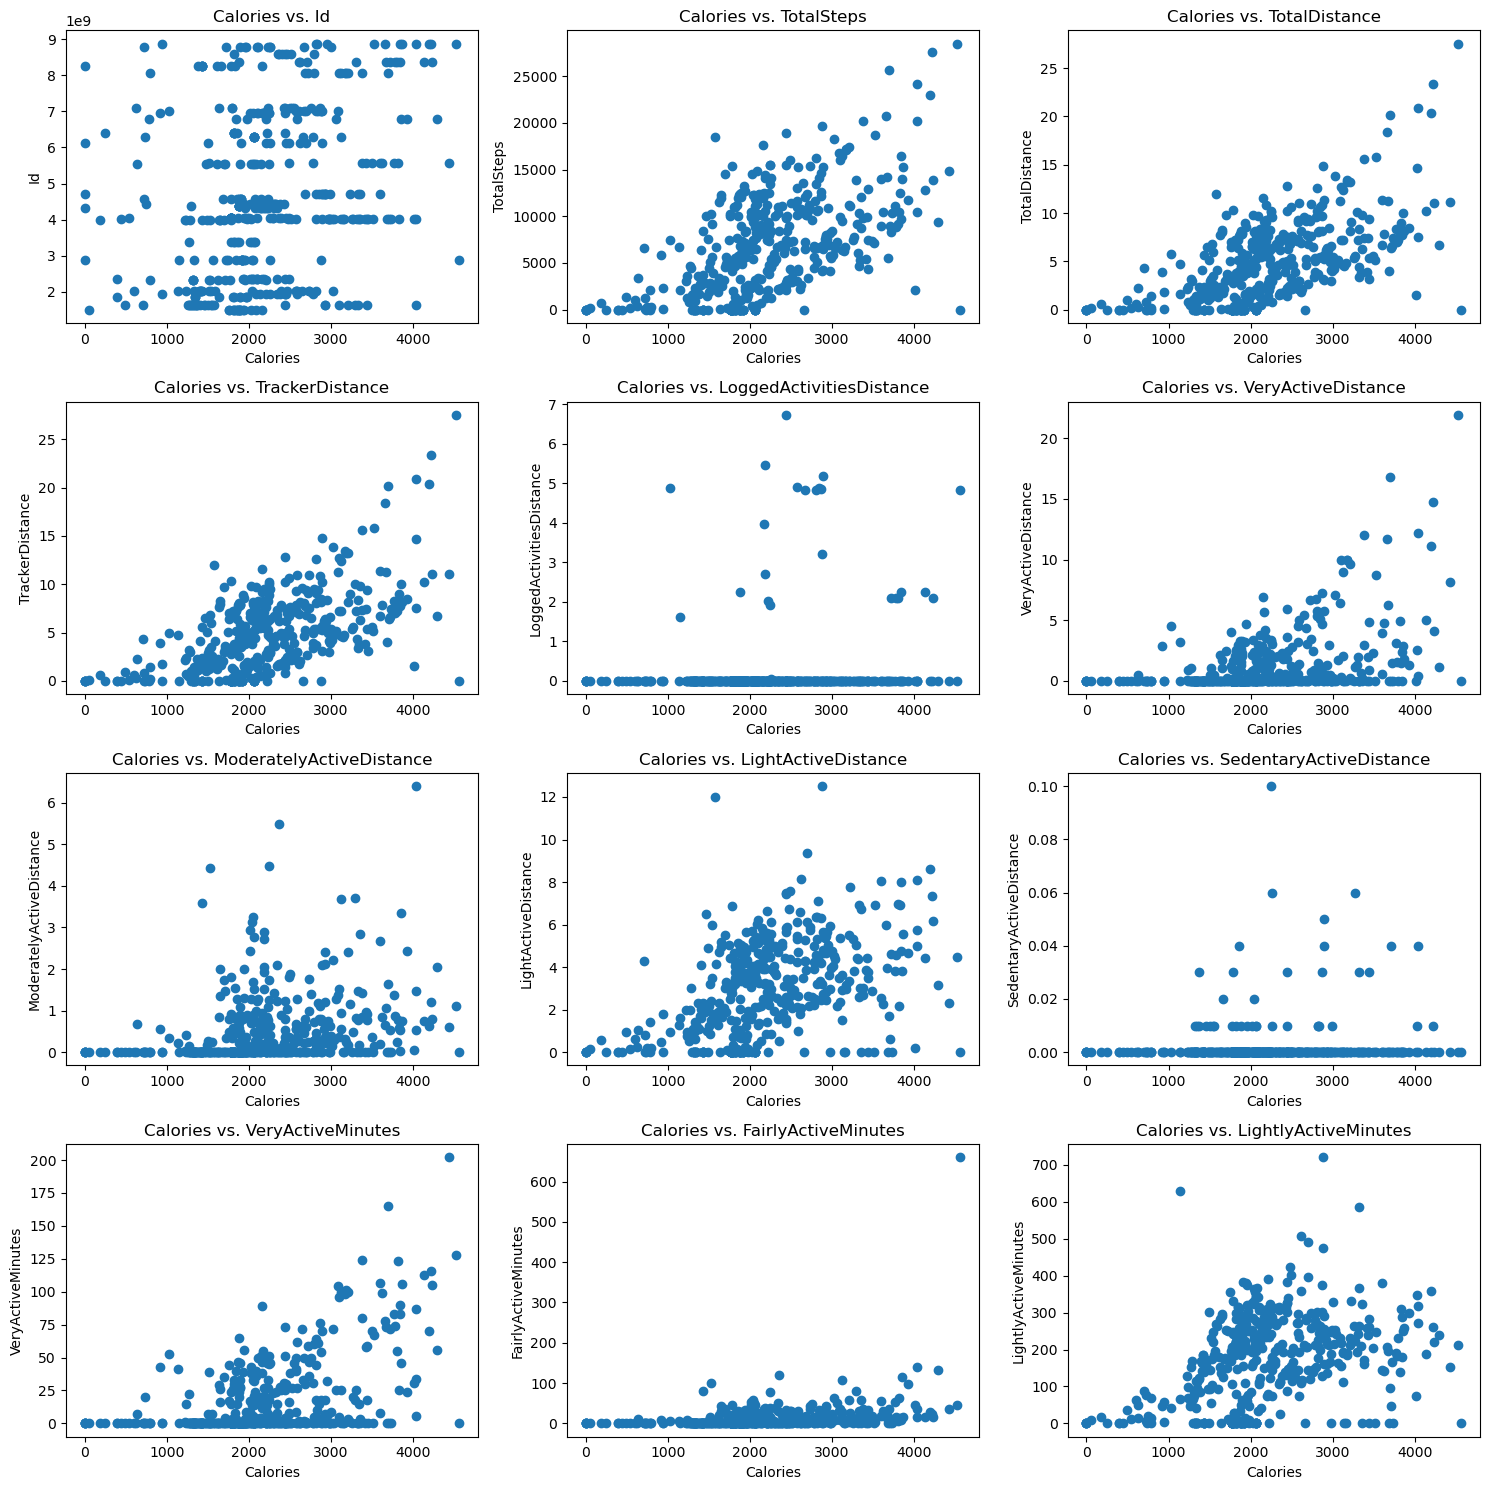

In [6]:
# bi-variate analysis based on calories and plot using subplots with 4 rows and 3 coulns

# Bivariate analysis with subplots for 'Calories'

# Select numerical features for bivariate analysis (excluding 'Calories')
numerical_features = df.select_dtypes(include=np.number).columns.drop('Calories')


# Create subplots
num_plots = len(numerical_features)
num_rows = 4  # Fixed number of rows
num_cols = 3  # Fixed number of columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate through numerical features and create scatter plots
for i, col in enumerate(numerical_features):
    if i < num_rows * num_cols: # Check if we are within the subplot grid
      axes[i].scatter(df['Calories'], df[col])
      axes[i].set_title(f'Calories vs. {col}')
      axes[i].set_xlabel('Calories')
      axes[i].set_ylabel(col)
    else:
      break # Exit loop if we exceed the number of subplots

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Panda Profiling will provide detailed information about different fields in the input data

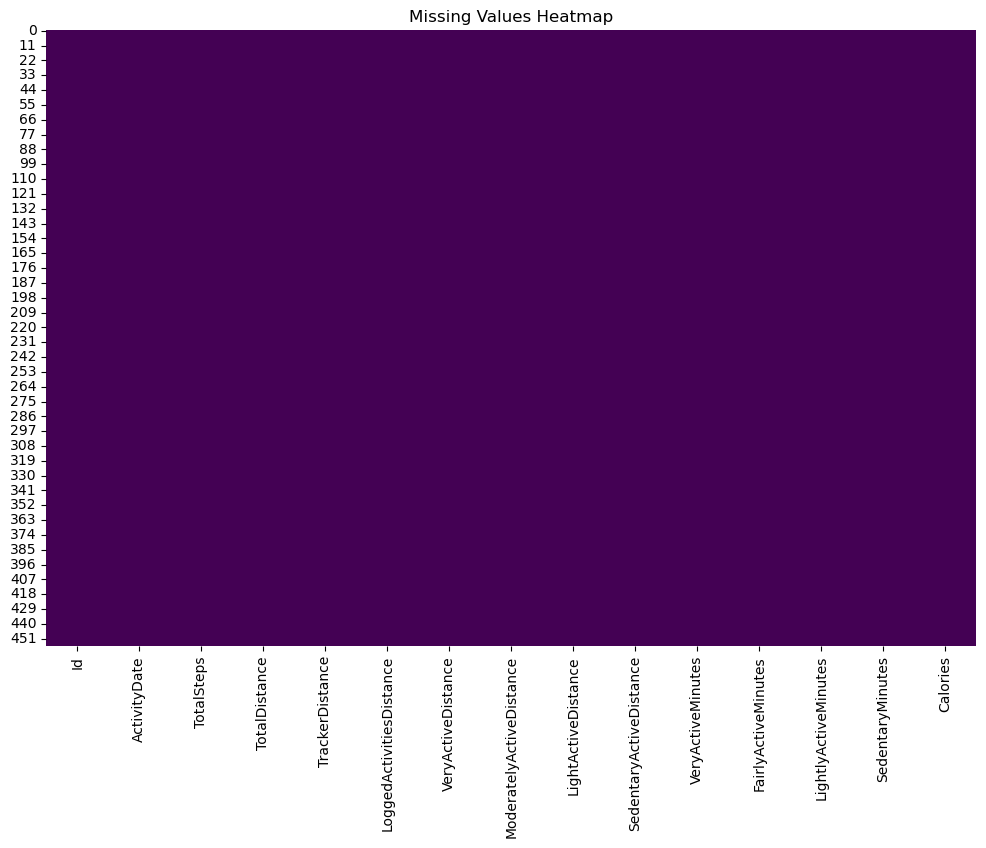

In [7]:
# heatmap of missing values

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

###  Some quick observations on the data

**From the bivariate analysis**
- Clearly there are some zero values for Total Distance and Calories which we will need to clean up (i.e., remove) in data prep
- Concentration of users with total distance between 3 to 15 miles and Calories between 1000 to 4000
- Few outliers over 20 miles but still with Calories between 1000 to 4000. Although a couple over 25 miles with Calories over 4000
- Limited records with Total Distance over 25k miles and Calories over 4000##
- Strong correlation between Total Steps taken and Distance. As the TotalDistance increases, the TotalSteps also increase showing a linear relationship between the two features.
- Interesting observations with folks logging zero active minutes but recording values for Total Distance. Maybe Fitbit not working and bad data. These are  candidates to be removed during data preparation (i.e., remove records where Very Active Minutes is zero)

- We have 33 unique users in the dataset recording their activities over a number of days. Max no of days for some records is 31 days (i.e., one month) Let's explore one user and visualize their activities over that one month period.


**From the heatmap:**
- Strong correlation between Total Distance and Tracker Distance. Very Active Distance also shows a strong correlation with Total Distance and Tracker Distance features.

- However, there is weak correlation across the board between the computed weight loss features and the other features.


**From univariate analysis**
- LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance and SedentaryActiveDistance may not be valuable for modelling. We can remove them
- There are some rows with Calories = zero and Total Distance = zero as these records are not useful


##### Questions